In [116]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [148]:
df = pd.read_csv('uber.csv');

In [149]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [151]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [152]:
df.drop(columns = ['Unnamed: 0','key'], inplace=True)

In [153]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [155]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [156]:
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(),inplace = True)
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)

In [157]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [158]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

### PICKUP DATE TIME IN WRONG FORMAT

In [159]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime) 

In [160]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [161]:
df = df.assign(hour = df.pickup_datetime.dt.hour,
              day = df.pickup_datetime.dt.day,
               dayOfWeek = df.pickup_datetime.dt.dayofweek,
               year = df.pickup_datetime.dt.year,
               month = df.pickup_datetime.dt.month
              )

In [162]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,dayOfWeek,year,month
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,3,2015,5
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,4,2009,7
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,0,2009,8
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,4,2009,6
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,3,2014,8


In [163]:
df.drop(columns=['pickup_datetime'],inplace=True)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  200000 non-null  float64
 4   dropoff_latitude   200000 non-null  float64
 5   passenger_count    200000 non-null  int64  
 6   hour               200000 non-null  int64  
 7   day                200000 non-null  int64  
 8   dayOfWeek          200000 non-null  int64  
 9   year               200000 non-null  int64  
 10  month              200000 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 16.8 MB


### IDENTIFYING OUTLIERS

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
dayOfWeek               AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

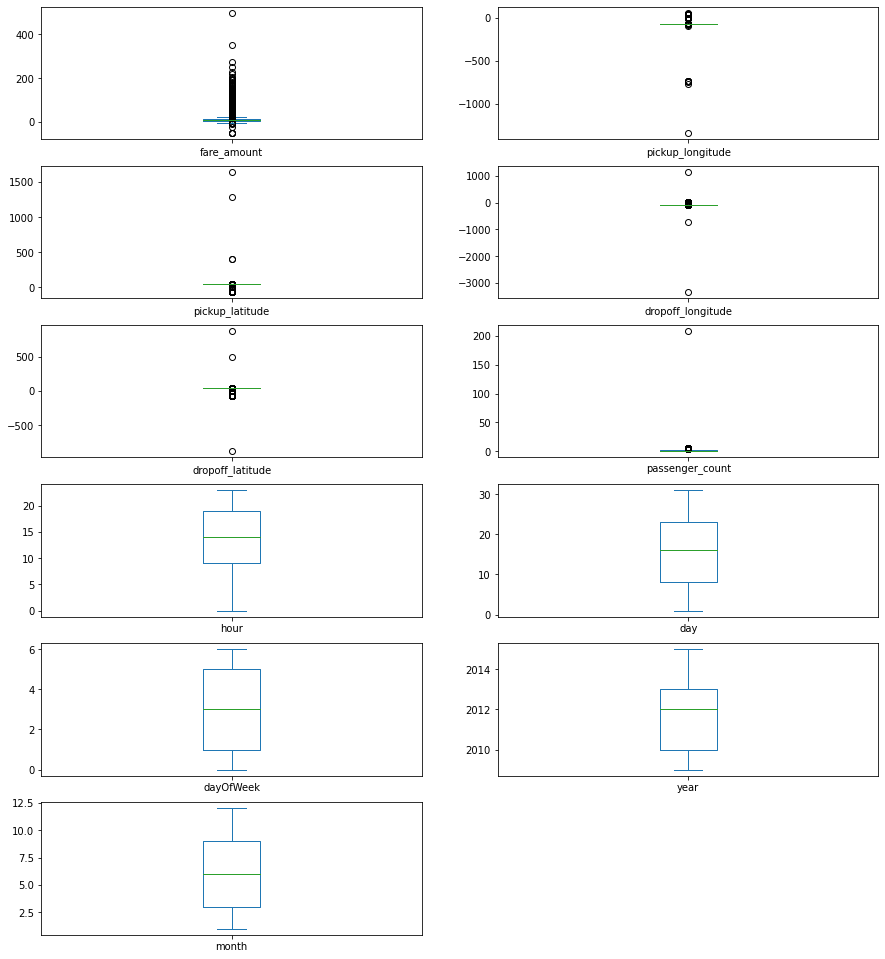

In [165]:
df.plot(kind = 'box', subplots = True,figsize = (15,20),layout = (7,2))

### REMOVING OUTLIER USING IQR METHOD

In [166]:
df.shape


(200000, 11)

In [167]:
def removeOutlier(df1,col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    
    IQR = Q1-Q3
    lower_whisker = Q1 - 1.5*IQR
    upper_whisker = Q3 + 1.5*IQR
    
    df1[col] = np.clip(df1[col],lower_whisker,upper_whisker)
    # df1 = df1[(df1[col] >= lower_whisker)]
    # df1 = df1[(df1[col] <= upper_whisker)]
    return df1

def treat_all_outlier(df):
    for i in df.columns:
        
        df = removeOutlier(df,i)
        
    return df

In [168]:
df = treat_all_outlier(df)


fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
dayOfWeek               AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

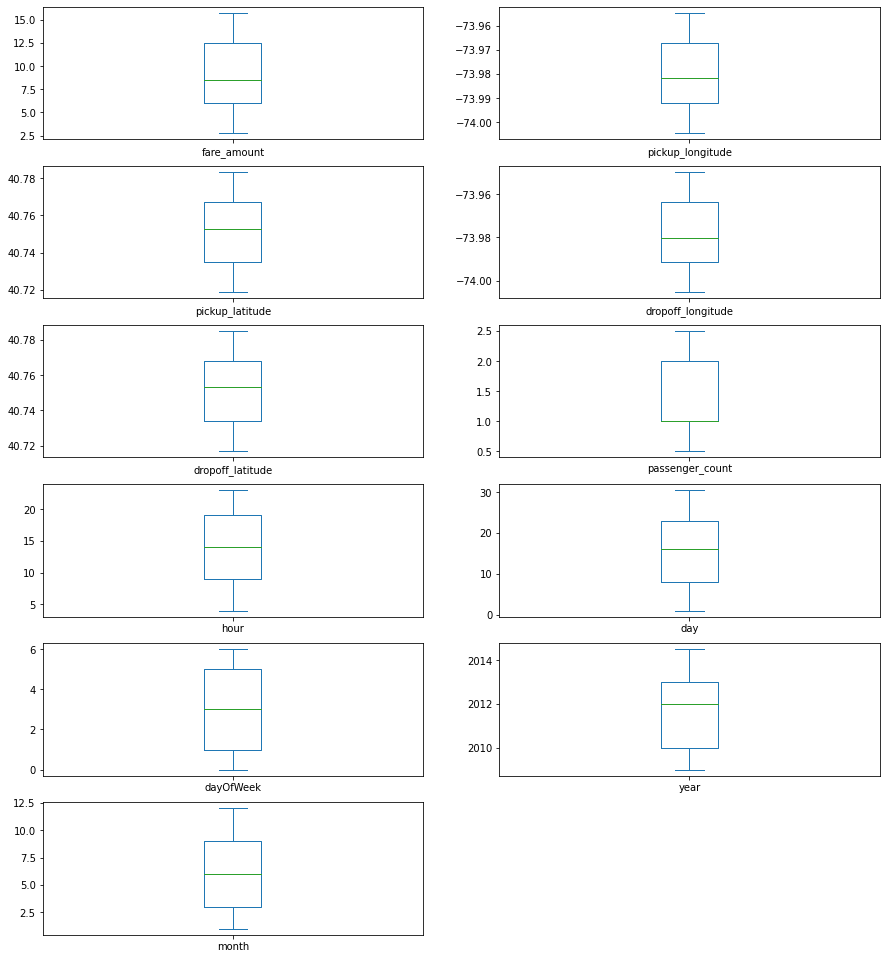

In [169]:
df.plot(kind = 'box', subplots = True,figsize = (15,20),layout = (7,2))

In [170]:
df.shape

(200000, 11)

### COMPUTING THE DISTANCE

In [138]:
!pip install haversine

In [171]:
#pip install haversine
import haversine as hs  #Calculate the distance using Haversine to calculate the distance between to points. Can't use Eucladian as it is for flat surface.
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
        long1,lati1,long2,lati2 = [df['pickup_longitude'][pos],df['pickup_latitude'][pos],df['dropoff_longitude'][pos],df['dropoff_latitude'][pos]]
        loc1=(lati1,long1)
        loc2=(lati2,long2)
        c = hs.haversine(loc1,loc2)
        travel_dist.append(c)
    
print(travel_dist)
df['dist_travel_km'] = travel_dist
df.head()

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,dayOfWeek,year,month,dist_travel_km
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,3,2014.5,5,1.683325
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,4,2009.0,7,2.457593
2,12.90,-74.004521,40.740770,-73.962565,40.772647,1.0,21.0,24.0,0,2009.0,8,5.005230
3,5.30,-73.976124,40.783339,-73.965316,40.785090,2.5,8.0,26.0,4,2009.0,6,0.930569
4,15.75,-73.954698,40.744085,-73.973082,40.761247,2.5,17.0,28.0,3,2014.0,8,2.457606


In [172]:
df.head()
df.shape

(200000, 12)

In [173]:
#Uber doesn't travel over 130 kms so minimize the distance

df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
df.shape


(200000, 12)

In [174]:
#Finding inccorect latitude (Less than or greater than 90) and longitude (greater than or less than 180)

incorrect_cordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
                                   (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
                                   (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
                                   (df.dropoff_longitude > 180) |(df.dropoff_longitude < -180)]

In [175]:
df.drop(incorrect_cordinates, inplace = True, errors = 'ignore')

In [176]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,dayOfWeek,year,month,dist_travel_km
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,3,2014.5,5,1.683325
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,4,2009.0,7,2.457593
2,12.90,-74.004521,40.740770,-73.962565,40.772647,1.0,21.0,24.0,0,2009.0,8,5.005230
3,5.30,-73.976124,40.783339,-73.965316,40.785090,2.5,8.0,26.0,4,2009.0,6,0.930569
4,15.75,-73.954698,40.744085,-73.973082,40.761247,2.5,17.0,28.0,3,2014.0,8,2.457606


In [177]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
dayOfWeek            0
year                 0
month                0
dist_travel_km       0
dtype: int64

## CORRELATION

In [178]:
corr = df.corr() #Function to find the correlation

<AxesSubplot:>

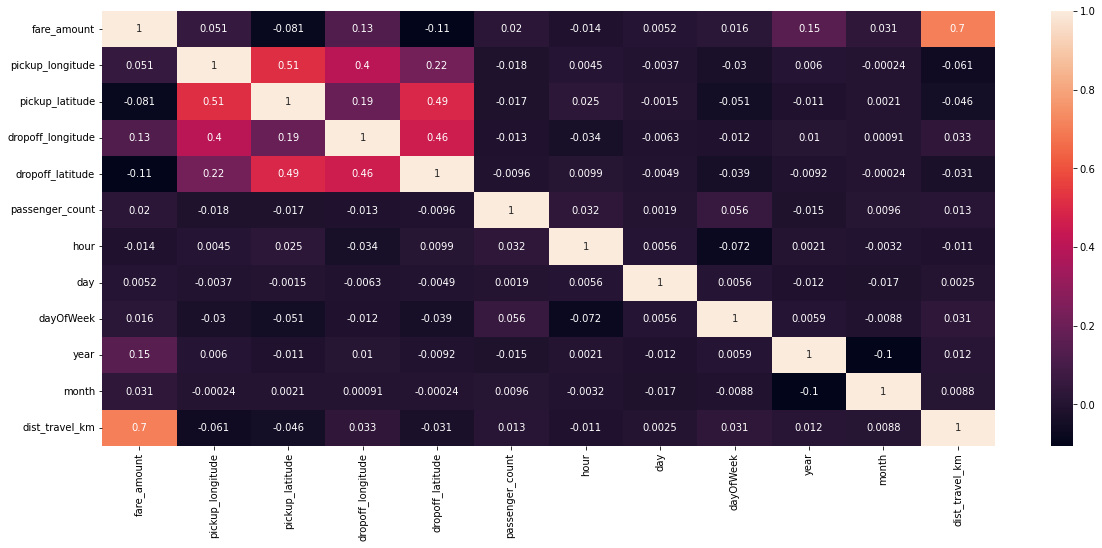

In [179]:
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot=True)

## SPLIT DATASET

In [180]:
x = df.drop(columns = ['fare_amount'])
y = df['fare_amount']

In [181]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=3)

In [182]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


### LINEAR REGRESSION

In [183]:
from sklearn.linear_model import LinearRegression

In [184]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [185]:
model.intercept_

4.085482584586218

In [186]:
model.coef_

array([ 1.18735293, -0.69133604,  1.7895836 , -1.76148562,  0.22186737,
       -0.04709651,  0.09529784, -0.14462902,  1.70954534,  0.50127022,
       14.74464698])

In [187]:
y_pred = model.predict(x_test)

In [188]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r2_score(y_test,y_pred)

0.5509967086325797

In [189]:
MAE = mean_absolute_error(y_test,y_pred)
MAE

2.034343407380806

In [190]:
MSE = mean_squared_error(y_test,y_pred)

In [191]:
RMSE = np.sqrt(MSE)
RMSE

2.67554467461443

## RANDOM FOREST

In [192]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)



In [193]:
model.fit(x_train,y_train)


RandomForestRegressor()

In [194]:
y_pred = model.predict(x_test)

In [195]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r2_score(y_test,y_pred)

0.7024880951217554

In [196]:
MAE = mean_absolute_error(y_test,y_pred)
MAE

1.5018084574239419

In [197]:
MSE = mean_squared_error(y_test,y_pred)

In [198]:
RMSE = np.sqrt(MSE)
RMSE

2.177908445343033